## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [78]:
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)})
sns.set(font_scale=1.5)

In [2]:
df = pd.read_csv("data/flights_cleaned_no_outlier_iqr_with_delays.csv")

In [3]:
df.shape # 2073115 original before filtering

(2073115, 39)

In [4]:
df = df.iloc[: , 1:] # drop weird unnamed column
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,weather_type,passengers,month,combined_delay
0,2019-10-02,AA,AA_CODESHARE,AA,5330,OH,5330,10581,BGR,"Bangor, ME",11278,DCA,"Washington, DC",543,535.0,-8.0,11.0,546.0,726.0,5.0,749,731.0,-18.0,N,126.0,116.0,100.0,1.0,590.0,0.0,0.0,0.0,0.0,0.0,Rainy,85523.0,1788.0,0.0
1,2019-10-02,AA,AA_CODESHARE,AA,3073,OO,3073,10581,BGR,"Bangor, ME",13930,ORD,"Chicago, IL",1328,1324.0,-4.0,17.0,1341.0,1515.0,14.0,1530,1529.0,-1.0,N,182.0,185.0,154.0,1.0,978.0,0.0,0.0,0.0,0.0,0.0,Rainy,85523.0,1788.0,0.0
2,2019-10-02,AA,AA_CODESHARE,AA,4023,MQ,4023,10581,BGR,"Bangor, ME",12953,LGA,"New York, NY",1449,1449.0,0.0,13.0,1502.0,1612.0,2.0,1629,1614.0,-15.0,N,100.0,85.0,70.0,1.0,378.0,0.0,0.0,0.0,0.0,0.0,Rainy,85523.0,1788.0,0.0
3,2019-10-02,G4,G4,G4,2119,G4,2119,10581,BGR,"Bangor, ME",14761,SFB,"Sanford, FL",1301,1308.0,7.0,7.0,1315.0,1554.0,5.0,1623,1559.0,-24.0,N,202.0,171.0,159.0,1.0,1299.0,0.0,0.0,0.0,0.0,0.0,Rainy,85523.0,1788.0,0.0
4,2019-10-02,AA,AA_CODESHARE,AA,4730,PT,4730,10581,BGR,"Bangor, ME",14100,PHL,"Philadelphia, PA",1001,951.0,-10.0,9.0,1000.0,1127.0,7.0,1149,1134.0,-15.0,N,108.0,103.0,87.0,1.0,473.0,0.0,0.0,0.0,0.0,0.0,Rainy,85523.0,1788.0,0.0


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [5]:
from scipy import stats

In [6]:
arr_delay = df.arr_delay

In [7]:
stats.kstest(arr_delay,stats.norm.cdf)

KstestResult(statistic=0.7447441942228243, pvalue=0.0)

In [8]:
stats.shapiro(arr_delay)

/Users/louisrossi/opt/anaconda3/envs/ml/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9835553765296936, pvalue=0.0)

In [9]:
sample = df.sample(frac=0.05)
stats.shapiro(sample.arr_delay)

ShapiroResult(statistic=0.987094521522522, pvalue=0.0)

(-300.0, 300.0)

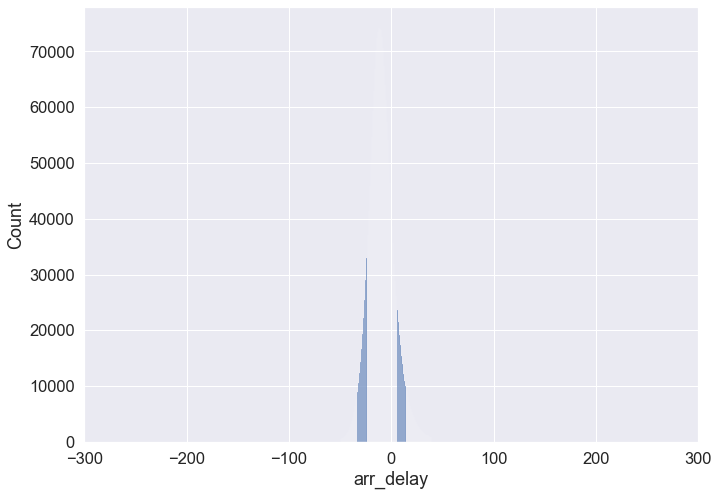

In [10]:
sns.histplot(arr_delay)
plt.xlim(-300, 300)

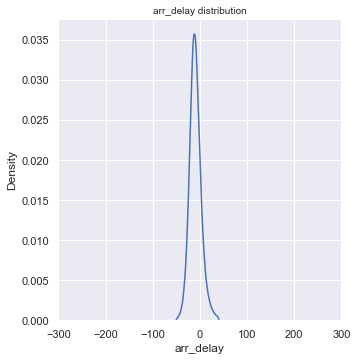

In [11]:
# Arrival Delay Distribution after excluding the outliers
sns.set_theme(style="darkgrid")
sns.displot(df, x="arr_delay",kind='kde')
plt.title("arr_delay distribution", size=10)
plt.xlim(-300, 300)
plt.show()

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [12]:
task_2 = pd.read_csv("data/all_months_raw.csv") # small raw sample from database
task_2['month'] = pd.to_datetime(task_2['fl_date'], format='%Y-%m-%d')
task_2 = task_2.filter(items=['month', 'arr_delay'])
task_2_grouped = task_2.groupby(pd.Grouper(key='month', axis=0, 
                      freq='M')).sum()
task_2_grouped.reset_index(inplace=True)
task_2_grouped.month = [1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]

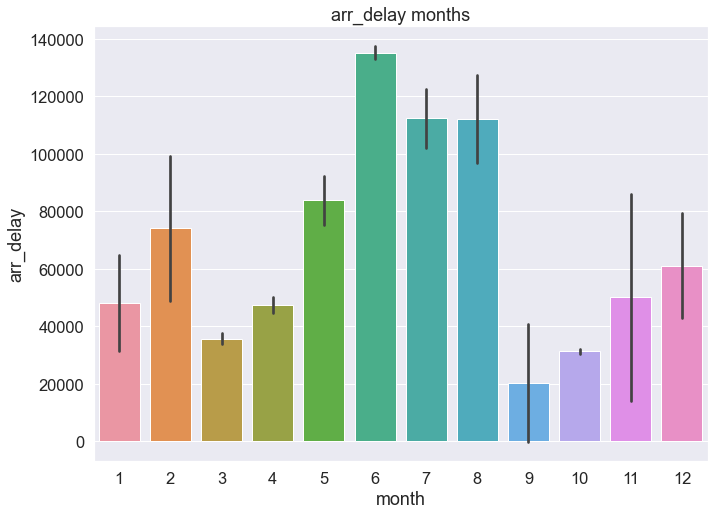

In [79]:
sns_plot = sns.barplot(x= task_2_grouped.month,y=task_2_grouped.arr_delay).set_title("arr_delay months")
plt.savefig('arr_delay_monthly.png')

In [14]:
# why?
task_2 = pd.read_csv("data/all_months_raw.csv") # small raw sample from db
df_passengers = pd.read_csv("data/all_passengers_raw.csv") # small sample from db

df_passengers = df_passengers.filter(items=['month', 'passengers'])
df_passengers = df_passengers.groupby(by=["month"]).sum()
df_passengers.reset_index(inplace=True)

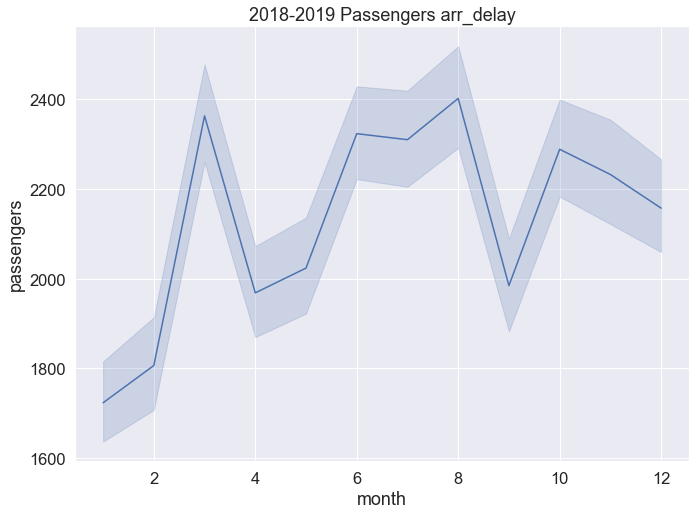

In [80]:
sns.lineplot(data=df_passengers, x='month', y="passengers").set_title("2018-2019 Passengers arr_delay")
plt.savefig('Passengers_arr_delay.png');

In [16]:
merged = task_2_grouped.merge(df_passengers, how='left', on='month')

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
merged[['arr_delay','passengers']] = ss.fit_transform(merged[['arr_delay','passengers']])

In [18]:
merged = merged.drop(columns="month")

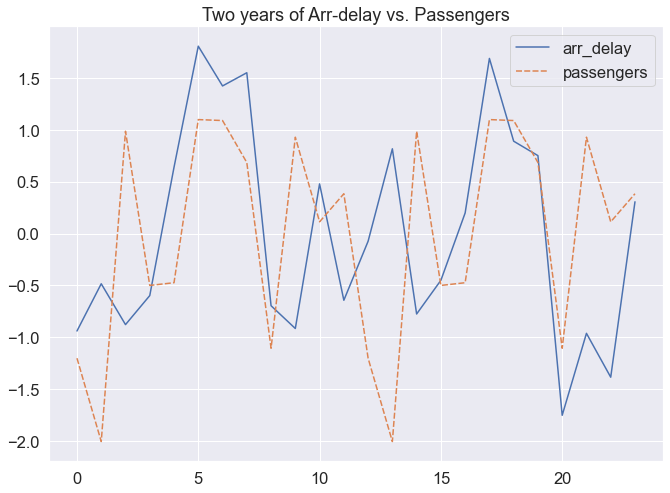

In [81]:
sns.lineplot(data=merged).set_title("Two years of Arr-delay vs. Passengers")
plt.savefig('Passenger_arr_delay_2.png');

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [20]:
weather = pd.read_csv("data/weather_data.txt")
task_3 = pd.read_csv("data/all_months_raw.csv")

In [21]:
weather = weather.filter(items=['date_time','location','weather_type'])
task_3 = task_3.filter(items=['fl_date', 'origin', 'arr_delay'])

In [22]:
task_3 = task_3.sample(frac=0.5)
weather = weather.sample(frac=0.5)

In [23]:
weather_delay = task_3.merge(weather, 
                                    left_on=['fl_date', 'origin'], 
                                    right_on=['date_time', 'location'])

In [24]:
weather_delay.keys()

Index(['fl_date', 'origin', 'arr_delay', 'date_time', 'location',
       'weather_type'],
      dtype='object')

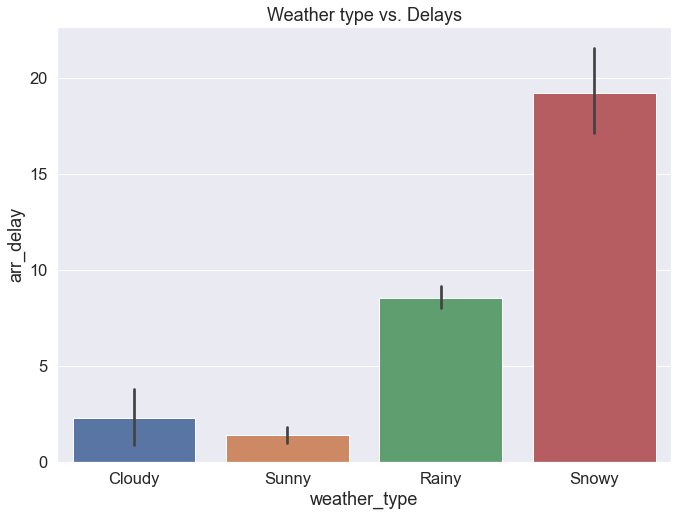

In [82]:
sns.barplot(x= weather_delay.weather_type,
            y=weather_delay.arr_delay).set_title("Weather type vs. Delays")
plt.savefig('Weather_delay.png');

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

# Taxi out times scatterplot

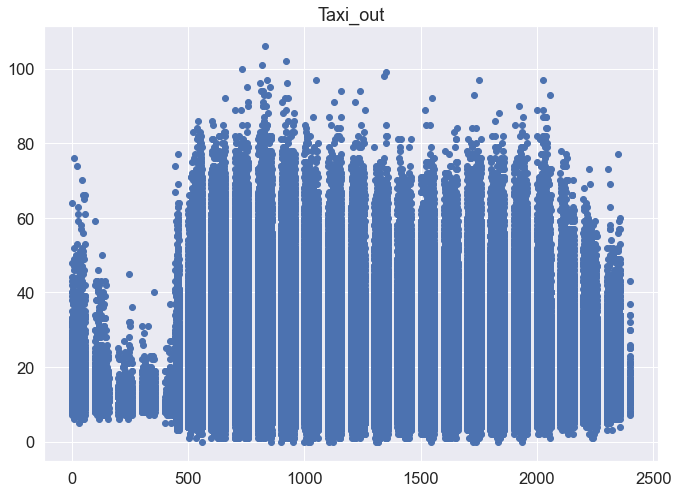

In [84]:
# plot taxi_out
plt.scatter(df.dep_time, df.taxi_out)
plt.title(label="Taxi_out")
plt.savefig('Taxi_out_timeofday.png');

# How many flights go out at what times?

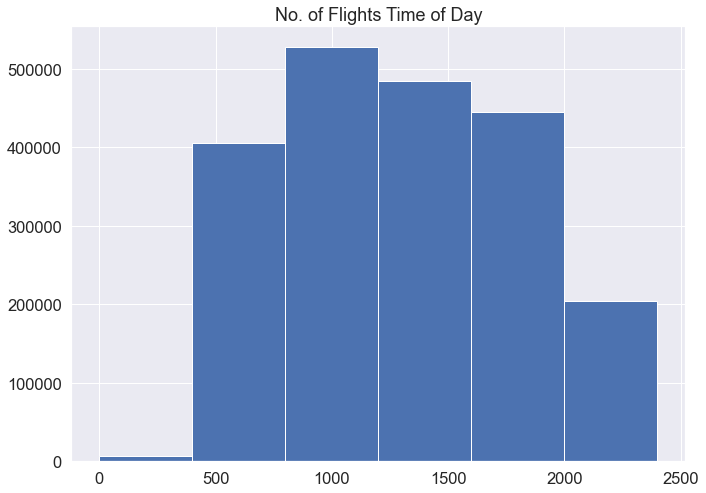

In [85]:
# plot traffic
plt.hist(df.dep_time, bins=[0,400,800,1200,1600,2000,2400])
plt.title(label="No. of Flights Time of Day")
plt.savefig('flights_timeofday.png');

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [28]:
# what is average of the % of delays is created before departure?
# are arrival delays caused by departure delays

# how many rows of dep_delay > 0
print((8623000-3010552)/8623000)

0.6508695349646295


In [29]:
# dep_delay y - fl_time x : arr_delay y - fl_time x
print(df.dep_delay.mean())
print(df.arr_delay.mean())

-3.274237560386182
-9.461144220171095


#### **Task 6**: How many states cover 50% of US air traffic? 

In [30]:
df_states = pd.DataFrame()
df_states['state'] = df['origin_city_name'].str[-2:]
df_states['count'] = 1
df_states = df_states.groupby(by=["state"]).sum()

In [31]:
df_states = df_states.sort_values(by="count", ascending=False)

In [32]:
df_states.head()

,count
state,
CA,224008
TX,208878
FL,158086
IL,121525
GA,113178


In [33]:
df_states["count"].sum()/2 # 50% value

1036557.5

In [34]:
df_states["count"].head(7).sum() # top 7 hit 50% mark

1027068

In [35]:
# answer - the first 7 states make up for 50% of US air traffic
df_states.head(7)

,count
state,
CA,224008
TX,208878
FL,158086
IL,121525
GA,113178
NY,101000
NC,100393


# stretch: how many cities does it take to make up 50% of US air traffic?

In [36]:
air_traffic_percent = df["origin_city_name"]
air_traffic_percent = pd.DataFrame(air_traffic_percent)
air_traffic_percent["count"] = 1
air_traffic_percent = air_traffic_percent.groupby(by=["origin_city_name"]).sum()
air_traffic_percent.sort_values(by="count", ascending=False).head(20)

,count
origin_city_name,
"Chicago, IL",115938
"Atlanta, GA",105940
"Dallas/Fort Worth, TX",76430
"New York, NY",72598
"Denver, CO",69907
"Charlotte, NC",69026
"Los Angeles, CA",63585
"Houston, TX",63163
"Washington, DC",61866


In [37]:
air_traffic_percent["count"].sum()/2 # 50% of traffic

1036557.5

In [38]:
air_traffic_percent["count"].head(180).sum() # 180!

1008344

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [39]:
# get df with no delay (0) and display mean arr_delay
# get df with delay (>0) and display mean arr_delay

### using nov_dec_jan as reference

In [40]:
# filter no delays and yes delays
df_delays = pd.DataFrame()
df_delays = df[df["dep_delay"] > 0]
df_ontime = pd.DataFrame()
df_ontime = df[df["dep_delay"] <= 0]

In [41]:
# drop all columns except dep_delay and arr_delay 
df_delays = df_delays.filter(['dep_delay', 'arr_delay'])
df_ontime = df_ontime.filter(['dep_delay', 'arr_delay'])

In [42]:
df_delays["dep_minus_arr"] = df_delays["dep_delay"] - df_delays["arr_delay"]
df_ontime["dep_minus_arr"] = df_ontime["dep_delay"] - df_ontime["arr_delay"]

In [43]:
delay_vs_ontime = pd.DataFrame()
delay_vs_ontime[["delayed_flights","ontime_flights"]] = [[df_delays.dep_minus_arr.mean(),df_ontime.dep_minus_arr.mean()]]

In [44]:
print("Delayed Flights: ", df_delays["dep_minus_arr"].mean())
print("Ontime Flights: ", df_ontime["dep_minus_arr"].mean())

Delayed Flights:  6.5417674236288645
Ontime Flights:  6.11557980208069


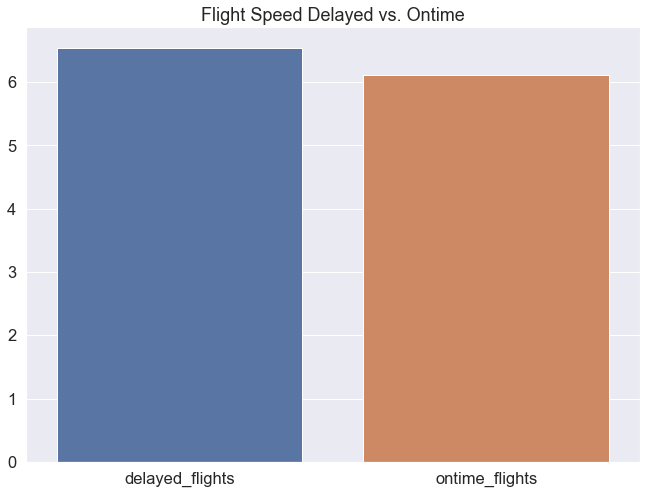

In [86]:
sns.barplot(data=delay_vs_ontime).set_title("Flight Speed Delayed vs. Ontime")
plt.savefig('flight_speed.png');

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

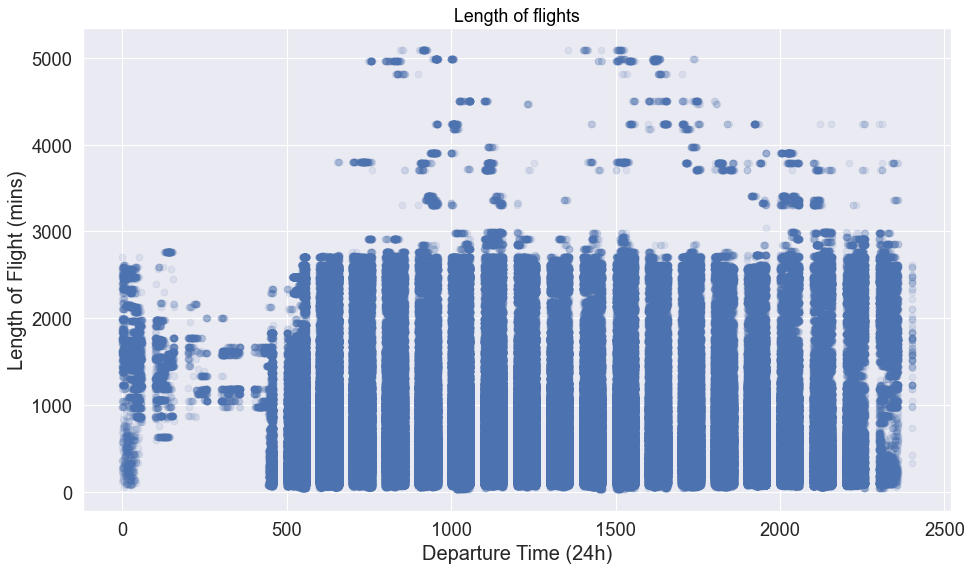

In [88]:
# plot length of flights with daytime

plt.figure(figsize=(14, 8), dpi=80)
plt.scatter(df.dep_time, df.distance, alpha=0.1, cmap='viridis')
plt.title("Length of flights", fontdict={"fontsize":16, "color":"black"})
plt.xlabel("Departure Time (24h)")
plt.ylabel("Length of Flight (mins)")
plt.savefig('Flight_length.png')
plt.show(); 
# Long: 10am to 4pm, Medium: 5am to 2am, Short: 3am to 5am

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

## Top 10 busiest airports

In [47]:
airport_traffic = df["origin"]
airport_traffic = pd.DataFrame(airport_traffic)
airport_traffic["flights"] = 1
airport_traffic = airport_traffic.groupby(by="origin").count()
airport_traffic.reset_index(inplace=True)

In [48]:
airport_traffic=airport_traffic.sort_values(by="flights", ascending=False).head(10)
airport_traffic

,origin,flights
21,ATL,105940
252,ORD,97581
94,DFW,76430
93,DEN,69907
73,CLT,69026
191,LAX,63585
315,SEA,49008
165,IAH,48675
267,PHX,47337
101,DTW,46085


## passenger load check

In [49]:
df_passenger_load = pd.read_csv("data/passengers_nov_dec_jan_raw.csv") # same dates as above

In [50]:
# Mapping file for airport names
import json
with open('data/airport_names_dict.txt') as f: # my map
    data = f.read()
airport_names_dict = json.loads(data)

# Adding new column with full airport names
df_passenger_load["airport_names"] = df_passenger_load["origin"]
df_passenger_load["airport_names"] = df_passenger_load['airport_names'].map(airport_names_dict) 

In [51]:
df_passenger_load = df_passenger_load.filter(['airport_names', 'passengers'])
df_passenger_load = df_passenger_load.groupby(by="airport_names").sum()
df_passenger_load.reset_index(inplace=True)
df_passenger_load=df_passenger_load.sort_values(by="passengers", ascending=False).head(10)

# Passenger load and number of flights relates somewhat... but not 100%

In [52]:
print(df_passenger_load, "\n\n")
print(airport_traffic)

                                         airport_names  passengers
14   Atlanta-Sandy Springs-Marietta, GA - Hartsfiel...  60719172.0
155  Los Angeles-Long Beach-Santa Ana, CA - Los Ang...  49062946.0
49   Chicago-Naperville-Joliet, IL-IN-WI - O'Hare I...  44221621.0
64   Dallas-Fort Worth-Arlington, TX - Dallas/Fort ...  39126694.0
68   Denver-Aurora-Broomfield, CO - Denver Internat...  35506258.0
188  New York-New Jersey-Long Island, NY-NJ-PA - Jo...  34749183.0
232  San Francisco-Oakland-Freemont, CA - San Franc...  31052704.0
144  Las Vegas-Paradise, NV - McCarran Internationa...  27858926.0
197  Orlando-Kissimmee, FL - Orlando International ...  27742537.0
169  Miami-Fort Lauderdale-Pompano Beach, FL - Miam...  27486645.0 


    origin  flights
21     ATL   105940
252    ORD    97581
94     DFW    76430
93     DEN    69907
73     CLT    69026
191    LAX    63585
315    SEA    49008
165    IAH    48675
267    PHX    47337
101    DTW    46085


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [53]:
task_10_raw = pd.read_csv("data/all_months_raw.csv")

In [54]:
def task_10_filtering(data, filter_to, group_by):
    task_10 = data.filter(items=filter_to)
    task_10['fl_date'] = pd.to_datetime(task_10['fl_date'], format='%Y-%m-%d')
    task_10['fl_date'] = pd.DatetimeIndex(task_10['fl_date']).month
    task_10_grouped = task_10.groupby(by=group_by).mean()
    task_10_grouped.reset_index(inplace=True)
    return task_10_grouped

In [55]:
def filter_groupby(data, filter_, groupby_):
    df_ = data.filter(items=filter_)
    df_ = df_.groupby(by=groupby_).sum()
    df_.reset_index(inplace=True)
    return df_

## Monthly mean delay per airline

In [56]:
t10_delay_mean = task_10_filtering(task_10_raw, 
                  ['fl_date','mkt_unique_carrier','arr_delay'],
                  ['mkt_unique_carrier','fl_date'])

## Find out distance covered monthly by different air carriers

In [57]:
t10_distance = task_10_filtering(task_10_raw, 
                  ['fl_date','mkt_unique_carrier','distance'],
                  ['mkt_unique_carrier','fl_date'])

## Find out number of passengers that were carried by different air carriers

In [58]:
df_passengers = pd.read_csv("data/all_passengers_raw.csv") # small sample from db

In [59]:
t10_passengers = filter_groupby(df_passengers, 
               ['carrier_name', 'passengers'], 
               ["carrier_name"])

## total fuel consumption 2018

In [60]:
fuel = pd.read_csv("data/fuel_comsumption_2018.csv")

In [61]:
t10_fuel = filter_groupby(fuel, ['carrier_name','total_gallons','total_cost'], ['carrier_name'])

### final answer

In [62]:
# Now create a final answer for do delays = fuel consumption
t10_delay_mean.sort_values(by=['arr_delay'], ascending=False).head(20)

,mkt_unique_carrier,fl_date,arr_delay
54,F9,7,23.627193
65,G4,6,19.378840
53,F9,6,18.456107
24,B6,1,17.698039
101,UA,6,16.905304
26,B6,3,16.169096
35,B6,12,16.036187
55,F9,8,15.612245
31,B6,8,15.370189
52,F9,5,15.052392


In [63]:
t10_passengers.sort_values(by=['passengers'], ascending=False).head(20)

,carrier_name,passengers
265,Southwest Airlines Co.,24515608.0
106,Delta Air Lines Inc.,23127754.0
49,American Airlines Inc.,21103513.0
306,United Air Lines Inc.,15794188.0
172,JetBlue Airways,5946620.0
261,SkyWest Airlines Inc.,5379248.0
42,Alaska Airlines Inc.,4719794.0
267,Spirit Air Lines,3846606.0
155,Hawaiian Airlines Inc.,3137857.0
128,ExpressJet Airlines Inc.,2372469.0


In [64]:
t10_fuel.sort_values(by=['total_gallons'], ascending=False).head(20)

,carrier_name,total_gallons,total_cost
5,American Airlines Inc.,3.644229e+09,7.664752e+09
12,Delta Air Lines Inc.,3.532291e+09,7.804773e+09
47,United Air Lines Inc.,3.445675e+09,7.349735e+09
41,Southwest Airlines Co.,2.097334e+09,4.401933e+09
18,Federal Express Corporation,1.191254e+09,2.520032e+09
48,United Parcel Service,8.710680e+08,1.833157e+09
25,JetBlue Airways,8.491668e+08,1.899236e+09
2,Alaska Airlines Inc.,7.268123e+08,1.677872e+09
8,Atlas Air Inc.,5.385347e+08,1.183040e+09
42,Spirit Air Lines,4.123464e+08,9.393240e+08


In [65]:
# 1 - get fuel per passenger
# 2 - merge fuel per passenger to delay times
# 3 - find a way to plot it.

In [66]:
fuel_per_passenger = t10_fuel.merge(t10_passengers, how='left', on='carrier_name')

In [67]:
fuel_per_passenger = fuel_per_passenger[fuel_per_passenger['passengers'] >0]

In [68]:
fuel_per_passenger["fuel_per_passenger"] = fuel_per_passenger.total_gallons / fuel_per_passenger.passengers

In [69]:
fuel_per_passenger = fuel_per_passenger.filter(items=["carrier_name","fuel_per_passenger"]).sort_values(by=['fuel_per_passenger'], ascending=False)

In [70]:
fuel_per_passenger

,carrier_name,fuel_per_passenger
8,Atlas Air Inc.,86706.596522
31,National Air Cargo Group Inc d/ba National Air...,18834.305136
45,Tatonduk Outfitters Limited d/b/a Everts Air A...,4786.296182
33,Omni Air International LLC,2468.158141
44,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",846.153422
30,Miami Air International,425.424678
14,Elite Airways LLC,311.800315
47,United Air Lines Inc.,218.160963
9,Avjet Corporation,193.997881
5,American Airlines Inc.,172.683535


In [71]:
t10_delay_mean.head() # let's bring in the dictionary ...

,mkt_unique_carrier,fl_date,arr_delay
0,AA,1,4.071241
1,AA,2,7.541176
2,AA,3,2.613284
3,AA,4,5.403794
4,AA,5,9.590708


In [72]:
# Mapping file for airline names
import json
with open('data/airline_names_dict.txt') as f: # my map
    data2 = f.read()
airline_names_dict = json.loads(data2)

In [73]:
t10_delay_mean["mkt_unique_carrier"] = t10_delay_mean['mkt_unique_carrier'].map(airline_names_dict) 

In [74]:
t10_delay_mean = t10_delay_mean.sort_values(by=['arr_delay'], ascending=False)

In [75]:
# carrier names are too different from all tables, giving up here. Can probably eyeball

In [76]:
t10_delay_mean.head(15) # seems we have tons of outliers - private jet airlines?

,mkt_unique_carrier,fl_date,arr_delay
54,F9: Frontier Airlines Inc.,7,23.627193
65,G4: Allegiant Air,6,19.378840
53,F9: Frontier Airlines Inc.,6,18.456107
24,B6: jetBlue Airways,1,17.698039
101,UA: United Air Lines Inc.,6,16.905304
26,B6: jetBlue Airways,3,16.169096
35,B6: jetBlue Airways,12,16.036187
55,F9: Frontier Airlines Inc.,8,15.612245
31,B6: jetBlue Airways,8,15.370189
52,F9: Frontier Airlines Inc.,5,15.052392


In [77]:
fuel_per_passenger.head(15) # seems we have tons of outliers - private jet airlines?

,carrier_name,fuel_per_passenger
8,Atlas Air Inc.,86706.596522
31,National Air Cargo Group Inc d/ba National Air...,18834.305136
45,Tatonduk Outfitters Limited d/b/a Everts Air A...,4786.296182
33,Omni Air International LLC,2468.158141
44,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",846.153422
30,Miami Air International,425.424678
14,Elite Airways LLC,311.800315
47,United Air Lines Inc.,218.160963
9,Avjet Corporation,193.997881
5,American Airlines Inc.,172.683535
